In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
!conda install -c anaconda seaborn -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.0
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/vivekkannajayaprakash/opt/miniconda3/envs/tensorflow

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.10.14 |                0         127 KB  anaconda
    certifi-2020.6.20          |           py38_0         159 KB  anaconda
    seaborn-0.11.0             |             py_0         216 KB  anaconda
    ------------------------------------------------------------
                                           Total:         502 KB

The following NEW packages will be INSTALLED:

  seaborn            anaconda/noarch::seaborn-0.11.0-py_0

The following packages will be SUPERSE

In [2]:
import os
working_directory = os.getcwd()
print(working_directory)
# path  = working_directory + '/1000_Companies.csv'
# companies = pd.read_csv(path)

/Users/vivekkannajayaprakash/Documents/Artificial Intelligence/Stats & ML/ML = SIMPLILEARN NOTES/Worksheet 1/Linear_Regression


In [3]:
# Importing the dataset and Extracting the Independent and Dependent variables
path  = working_directory + '/1000_Companies.csv'
companies = pd.read_csv(path)
# X = companies.iloc[:, :-1].values
# y = companies.iloc[:, 4].values

In [4]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
companies

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [6]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


<AxesSubplot:>

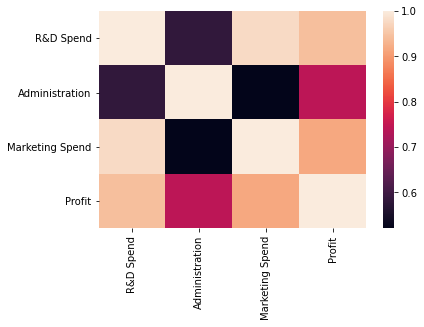

In [7]:
# Data Visualisation
# Building the Correlation matrix
sns.heatmap(companies.corr())

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer 
from sklearn.preprocessing import OneHotEncoder
label_1 = LabelEncoder()


In [13]:
# companies.head(1)
# companies['State']

In [14]:
companies.iloc[:,3] = label_1.fit_transform(companies.iloc[:,3])

column_trans = make_column_transformer(
    (OneHotEncoder(), ["State"]),
    remainder = "passthrough")

In [15]:
companies

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,2,192261.83000
1,162597.70,151377.590,443898.5300,0,191792.06000
2,153441.51,101145.550,407934.5400,1,191050.39000
3,144372.41,118671.850,383199.6200,2,182901.99000
4,142107.34,91391.770,366168.4200,1,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,0,95279.96251
996,134970.00,130390.080,329204.0228,0,164336.60550
997,100275.47,241926.310,227142.8200,0,413956.48000
998,128456.23,321652.140,281692.3200,0,333962.19000


In [17]:
ohe = OneHotEncoder()

In [18]:
ohe.fit_transform(companies[["State"]])

<1000x3 sparse matrix of type '<class 'numpy.float64'>'
	with 1000 stored elements in Compressed Sparse Row format>

In [19]:
X = companies.iloc[:, :-1].values
y = companies.iloc[:, 4].values

In [20]:
# Avoiding the Dummy Variable Trap
X = X[:, 1:]

In [21]:
# X.head(1)

In [22]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [23]:
X_train

array([[1.13104932e+05, 1.03373094e+05, 1.00000000e+00],
       [1.12225913e+05, 9.18886934e+04, 1.00000000e+00],
       [1.26224046e+05, 2.74774680e+05, 2.00000000e+00],
       ...,
       [1.13835527e+05, 1.12918344e+05, 0.00000000e+00],
       [1.20317403e+05, 1.97604218e+05, 0.00000000e+00],
       [1.27013716e+05, 2.85091731e+05, 0.00000000e+00]])

In [24]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([ 90085.86826588,  88754.91312008,  95067.94549922, 174561.65787467,
        84098.5210418 , 110609.57154563, 169113.12164489,  91728.41254293,
       163343.53619903,  55030.33279243,  67791.32369374, 150047.45881033,
       126323.19332675,  60360.92562603, 175712.59936988,  76196.55120622,
       118501.56191395, 163082.3466491 , 167029.42938967, 180398.02108227,
       103682.6765755 ,  86063.68688101, 179746.43568482,  84575.26190912,
       104937.45075683, 101255.33704411,  42094.86633633,  58202.27308482,
        69691.01291477, 227148.11481552, 120971.66037827, 111495.90145412,
       101742.68013268, 137741.3593582 ,  64882.31987602, 108697.46161373,
       184249.33088217, 170424.72440506, 173549.83041354, 117938.69096925,
        97099.83305992, 163939.21703866, 107590.98476361,  52074.42311196,
       116808.7612672 ,  59672.41394299, 157709.87356822,  79743.88194415,
       158989.73468786, 131083.23357801, 183541.62601948, 173515.48866719,
        93946.39182716,  

In [26]:
# Calculating the Coefficients
print(regressor.coef_)

[   1.0991705     0.34997357 -221.19950552]


In [27]:
# Calculating the Intercept
print(regressor.intercept_)

-94594.41881808711


In [28]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9091929063489951